The first step is to load in the csv we created in the previous notebook. In the context of these two notebooks, this is a little redundent - we could have just continued on in one longer notebook. Splitting it into two makes the notebooks themselsevels shorter, and there's a good chance you will need to load a csv in a different notebook in the future. To test the data have loaded in properly, the typical appraoch is to use the `head()` function, which will print the first few rows of the dataframe. 

In [3]:
## load ship_data.csv

import pandas
import numpy as np
import matplotlib.pyplot as plt

ship_data = pandas.read_csv('ship_data.csv', sep=',', header=0)

print(ship_data.head())

   Unnamed: 0    ship        id   title   startDate     endDate
0           0  Acasta  C1496956  ACASTA  01/09/1918  31/10/1918
1           1  Acasta  C1496944  ACASTA  08/02/1915  09/04/1915
2           2  Acasta  C1496952  ACASTA  01/11/1917  02/02/1918
3           3  Acasta  C1496951  ACASTA  01/05/1917  01/07/1917
4           4  Acasta  C1480967  ACASTA  01/08/1913  30/09/1913


In [4]:
## map each ship name to a number and add it as a column 

ship_names = ship_data['ship'].unique()
ship_names.sort()
ship_names_map = dict(zip(ship_names, range(len(ship_names))))
ship_data['ship_num'] = ship_data['ship'].map(ship_names_map)

print(ship_data)


      Unnamed: 0    ship        id   title   startDate     endDate  ship_num
0              0  Acasta  C1496956  ACASTA  01/09/1918  31/10/1918         0
1              1  Acasta  C1496944  ACASTA  08/02/1915  09/04/1915         0
2              2  Acasta  C1496952  ACASTA  01/11/1917  02/02/1918         0
3              3  Acasta  C1496951  ACASTA  01/05/1917  01/07/1917         0
4              4  Acasta  C1480967  ACASTA  01/08/1913  30/09/1913         0
...          ...     ...       ...     ...         ...         ...       ...
1893        1893   Wolfe  C1589635   WOLFE  01/03/1948  31/03/1948       138
1894        1894   Wolfe  C1589634   WOLFE  01/02/1948  28/02/1948       138
1895        1895   Wolfe  C1588748   WOLFE  01/06/1947  30/06/1947       138
1896        1896   Wolfe  C1587964   WOLFE  31/08/1946  30/09/1946       138
1897        1897   Wolfe  C1587962   WOLFE  01/07/1946  31/07/1946       138

[1898 rows x 7 columns]


for the main section of this notebook, we are going to use plotly to two graphs: a bar graph of cover dates for different record series, and a scatter graph of the description length vs start date, coloured by ship name. As there are a lot of ships, and thus even more records, we're going to limit to the first 10 ships to make the graphs more visible. 


/tmp/ipykernel_1594/1418749504.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ship_data_10["startDate"] = pandas.to_datetime(ship_data_10["startDate"], dayfirst=True)
/tmp/ipykernel_1594/1418749504.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ship_data_10["endDate"] = pandas.to_datetime(ship_data_10["endDate"], dayfirst=True)
/tmp/ipykernel_1594/1418749504.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

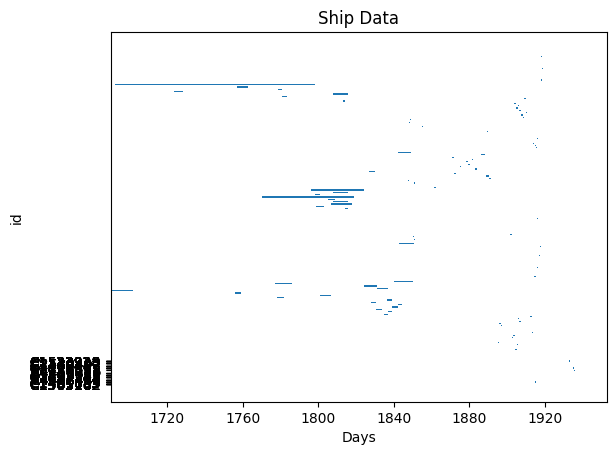

In [9]:
## isolate the data from the first 10 ships

ship_data_10 = ship_data[ship_data['ship_num'] < 11]

ship_data_10["startDate"] = pandas.to_datetime(ship_data_10["startDate"], dayfirst=True)
ship_data_10["endDate"] = pandas.to_datetime(ship_data_10["endDate"], dayfirst=True)
ship_data_10["duration"] = ship_data_10["endDate"] - ship_data_10["startDate"]

fig_basic, ax_basic = plt.subplots()

ax_basic.barh(ship_data_10['id'], ship_data_10['duration'], left=ship_data_10['startDate'], height=0.5)

ax_basic.set_yticks(ship_data_10['ship_num'])
ax_basic.set_yticklabels(ship_data_10['id'])
ax_basic.set_xlabel('Days')
ax_basic.set_ylabel('id')
ax_basic.set_title('Ship Data')

plt.show()

This first attempt looks a bit weird. We can improve this with a few tweaks. 

/tmp/ipykernel_1594/1322987334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ship_data_10['ship_color'] = ship_data_10['ship'].map(ship_colour_map)


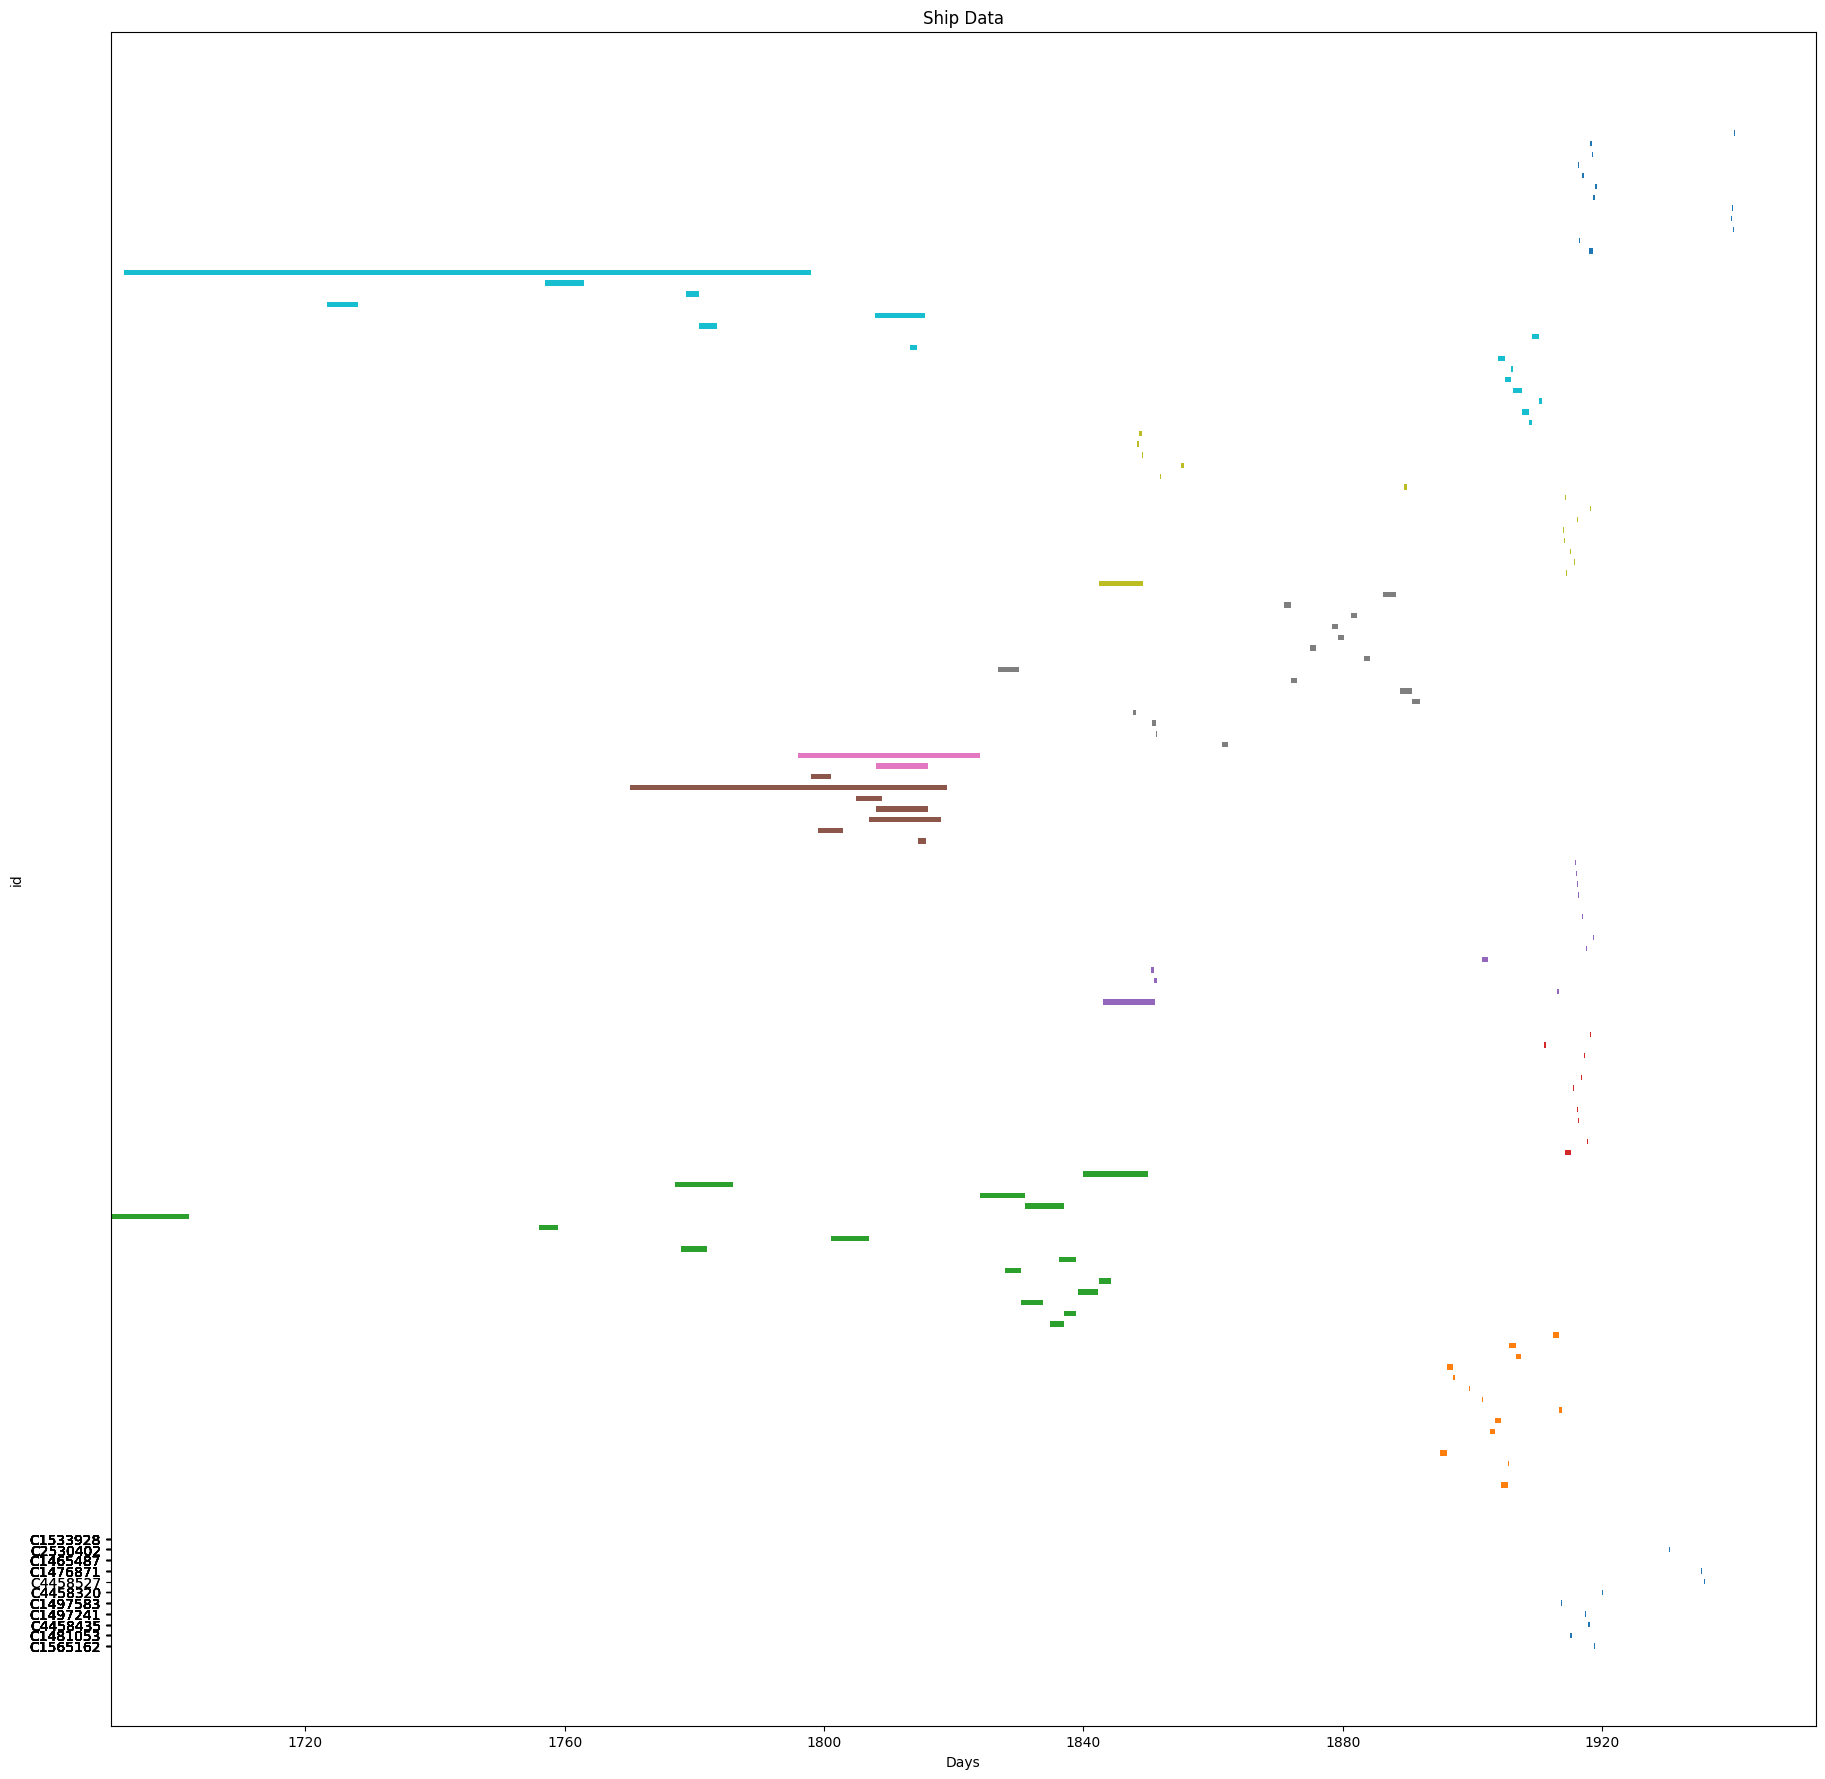

In [11]:
## map each ship name to a color and add it as a column

ship_colour_map = {}
for index, ship in enumerate(ship_names):
    ship_colour_map[ship] = f"C{index}"

ship_data_10['ship_color'] = ship_data_10['ship'].map(ship_colour_map)

fig_improved_1, ax_improved_1 = plt.subplots(figsize=(22, 22))

ax_improved_1.barh(ship_data_10['id'], ship_data_10['duration'], left=ship_data_10['startDate'], height=0.5, color=ship_data_10['ship_color'])

ax_improved_1.set_yticks(ship_data_10['ship_num'])
ax_improved_1.set_yticklabels(ship_data_10['id'])
ax_improved_1.set_xlabel('Days')
ax_improved_1.set_ylabel('id')
ax_improved_1.set_title('Ship Data')

plt.show()

In [8]:
print(ship_data_bar_graph_set)

      Unnamed: 0    ship        id   title  startDate    endDate duration
0              0  Acasta  C1496956  ACASTA 1918-09-01 1918-10-31  60 days
1              1  Acasta  C1496944  ACASTA 1915-02-08 1915-04-09  60 days
2              2  Acasta  C1496952  ACASTA 1917-11-01 1918-02-02  93 days
3              3  Acasta  C1496951  ACASTA 1917-05-01 1917-07-01  61 days
4              4  Acasta  C1480967  ACASTA 1913-08-01 1913-09-30  60 days
...          ...     ...       ...     ...        ...        ...      ...
1893        1893   Wolfe  C1589635   WOLFE 1948-03-01 1948-03-31  30 days
1894        1894   Wolfe  C1589634   WOLFE 1948-02-01 1948-02-28  27 days
1895        1895   Wolfe  C1588748   WOLFE 1947-06-01 1947-06-30  29 days
1896        1896   Wolfe  C1587964   WOLFE 1946-08-31 1946-09-30  30 days
1897        1897   Wolfe  C1587962   WOLFE 1946-07-01 1946-07-31  30 days

[1898 rows x 7 columns]
